In [4]:
import pandas as pd
import numpy as np
import json
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import nltk
import gensim
import os
import string
import re
import os
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import DBSCAN
from sklearn.externals import joblib
import csv
import tweepy
import cnfg
import datetime
import quandl
quandl.ApiConfig.api_key = '*********' 


pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)

In [5]:
from pandas import DataFrame
import json
from pymongo import MongoClient


client = MongoClient(port=12345)
db = client.stocks


df = DataFrame(list(db.stocks.find({})))

In [6]:
df['user'] = 'stock_whisperer'

In [7]:
list1 = []
for i in range(len(df['text'])):
    list1.append(df['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

In [8]:
list2 = []
for i in range(len(df['text'])):
    list2.append(se.str.split("b'")[i][1])

In [9]:
se2 = pd.Series(list2)
df['cleanedtext'] = se2.values

In [10]:
sandp100 = ['AAPL','ABBV','ABT','ACN','AGN','AIG','ALL','AMGN','AMZN','AXP','BA','BAC',
            'BIIB','BK','BLK','BMY','BRK.B','C','CAT','CELG','CL','CMCSA','COF','COP',
            'COST','CSCO','CVS','CVX','DD','DHR','DIS','DOW','DUK','EMR','EXC','F','FB',
            'FDX','FOX','FOXA','GD','GE','GILD','GM','GOOG','GOOGL','GS','HAL','HD','HON',
            'IBM','INTC','JNJ','JPM','KHC','KMI','KO','LLY','LMT','LOW','MA','MCD','MDLZ',
            'MDT','MET','MMM','MO','MON','MRK','MS','MSFT','NEE','NKE','ORCL','OXY','PCLN',
            'PEP','PFE','PG','PM','PYPL','QCOM','RTN','SBUX','SLB','SO','SPG','T','TGT',
            'TWX','TXN','UNH','UNP','UPS','USB','UTX','V','VZ','WBA','WFC','WMT','XOM']

sandp100find = ["XX'AAPL","XX'ABBV","XX'ABT","XX'ACN","XX'AGN","XX'AIG","XX'ALL","XX'AMGN",
                "XX'AMZN","XX'AXP","XX'BA","XX'BAC","XX'BIIB","XX'BK","XX'BLK","XX'BMY",
                "XX'BRK.B","XX'C","XX'CAT","XX'CELG","XX'CL","XX'CMCSA","XX'COF","XX'COP",
                "XX'COST","XX'CSCO","XX'CVS","XX'CVX","XX'DD","XX'DHR","XX'DIS","XX'DOW",
                "XX'DUK","XX'EMR","XX'EXC","XX'F","XX'FB","XX'FDX","XX'FOX","XX'FOXA","XX'GD",
                "XX'GE","XX'GILD","XX'GM","XX'GOOG","XX'GOOGL","XX'GS","XX'HAL","XX'HD","XX'HON",
                "XX'IBM","XX'INTC","XX'JNJ","XX'JPM","XX'KHC","XX'KMI","XX'KO","XX'LLY","XX'LMT",
                "XX'LOW","XX'MA","XX'MCD","XX'MDLZ","XX'MDT","XX'MET","XX'MMM","XX'MO","XX'MON",
                "XX'MRK","XX'MS","XX'MSFT","XX'NEE","XX'NKE","XX'ORCL","XX'OXY","XX'PCLN","XX'PEP",
                "XX'PFE","XX'PG","XX'PM","XX'PYPL","XX'QCOM","XX'RTN","XX'SBUX","XX'SLB","XX'SO",
                "XX'SPG","XX'T","XX'TGT","XX'TWX","XX'TXN","XX'UNH","XX'UNP","XX'UPS","XX'USB",
                "XX'UTX","XX'V","XX'VZ","XX'WBA","XX'WFC","XX'WMT","XX'XOM"]

sandp100lower = [element.lower() for element in sandp100]

In [11]:
df22 = df[df['cleanedtext'].str.contains("Whisper",na=False, case=False)]
df22 = df22[df22['cleanedtext'].str.contains('yester|from|Wisconsin|email|rocking', case=False)==False]
# df22 = df22[df22['cleanedtext'].str.contains('SPY|USO|GDX', case=True)==False]
df22 = df22[df22['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


In [12]:
import datetime as dt
df22['date'] = df22['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [13]:
df22 = df22.sort_values(by='date')
df23 = df22.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
df23 = df23.unstack()
df24 = df22.join(df23)
df25 = df24.reset_index()

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [14]:
for i in range(8, df25.shape[1]):
    df25.iloc[:,i] = df25.iloc[:,i].str.replace("XX'", '')

In [15]:
stock_quan = pd.read_csv('WIKI_PRICES_1ef64a24111c5bc7e6a0a66f6e37080e.csv')
quanstocklist = list(stock_quan.ticker.unique())
quanstocklist.remove('AA')
quanstocklist.remove('ANF')
quanstocklist.remove('AMD')
quanstocklist.remove('FOSL')
quanstocklist.remove('TASR')

In [16]:
df25.head(1)

,index,_id,created_at,id,text,user,cleanedtext,date,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)"
0,1153,5936b6abea2a7c07db003003,2015-03-26 14:06:56,581094988748070912,"b'The #Stock Whisper Of The Day: SPY, USO, GDX $SPY $USO $GDX http://t.co/Rk5IMPsksH'",stock_whisperer,"The #Stock Whisper Of The Day: SPY, USO, GDX XX'SPY XX'USO XX'GDX",2015-03-26,SPY,USO,GDX,None,None,None,None,None,None


In [17]:
# import feather

In [18]:
# dfnewww = df25.iloc[:,[2,5,8]]

In [19]:
# path = 'my_stocks.feather'
# feather.write_dataframe(dfnewww, path)

In [83]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(df25.iloc[:,7], df25.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=30)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
    #     print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
df25['perc_one'] = se.values

In [73]:
df25.perc_one.mean()

0.10335288522833626

In [48]:
# def link_to_api(X):
#     count = 0
#     enum_list = []
#     for a, b in zip(df25.iloc[:,7], df25.iloc[:,X]):
#         if not b in quanstocklist:
#     #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
#             enum_list.append('BLANK')
#             count += 1
#         else:
#             date_data = a
#             stock_name = b
#             new_date = a + dt.timedelta(days=30)
#             my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
#             enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3] * 100)
#             count += 1
#     #     print(count)
#     #     print(enum_list)
#     return enum_list


    
# se = pd.Series(link_to_api(8))
# df25['perc_one'] = se.values

In [95]:
se2 = pd.Series(link_to_api(9))
df25['perc_two'] = se2.values

In [15]:
se3 = pd.Series(link_to_api(10))
df25['perc_three'] = se3.values

In [16]:
# se4 = pd.Series(link_to_api(11))
# df25['perc_four'] = se4.values

In [17]:
# se5 = pd.Series(link_to_api(12))
# df25['perc_five'] = se5.values

In [18]:
# se6 = pd.Series(link_to_api(13))
# df25['perc_six'] = se6.values

In [19]:
# se7 = pd.Series(link_to_api(14))
# df25['perc_seven'] = se7.values

In [20]:
# se8 = pd.Series(link_to_api(15))
# df25['perc_eight'] = se8.values

In [21]:
# se9 = pd.Series(link_to_api(16))
# df25['perc_nine'] = se9.values

In [ ]:
df25['perc_one'] = pd.to_numeric(df25['perc_one'], errors='coerce')
# df25['perc_two'] = pd.to_numeric(df25['perc_two'], errors='coerce')
# df25['perc_three'] = pd.to_numeric(df25['perc_three'], errors='coerce')
# df25['perc_four'] = pd.to_numeric(df25['perc_four'], errors='coerce')
# df25['perc_five'] = pd.to_numeric(df25['perc_five'], errors='coerce')
# df25['perc_six'] = pd.to_numeric(df25['perc_six'], errors='coerce')
# df25['perc_seven'] = pd.to_numeric(df25['perc_seven'], errors='coerce')
# df25['perc_eight'] = pd.to_numeric(df25['perc_eight'], errors='coerce')
# df25['perc_nine'] = pd.to_numeric(df25['perc_nine'], errors='coerce')

In [68]:
df25.iloc[:,17].mean()

0.0010335288522833614

In [25]:
# df25.iloc[:,18].mean()

1.9857588078910091

In [26]:
# df25.iloc[:,19].mean()

1.6924292736057696

In [27]:
# import datetime

# print(df25[(df25['date']>datetime.date(2015,4,30)) & (df25['date']<datetime.date(2015,6,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,5,31)) & (df25['date']<datetime.date(2015,7,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,6,30)) & (df25['date']<datetime.date(2015,8,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,7,31)) & (df25['date']<datetime.date(2015,9,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,8,31)) & (df25['date']<datetime.date(2015,10,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,9,30)) & (df25['date']<datetime.date(2015,11,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,10,31)) & (df25['date']<datetime.date(2015,12,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,11,30)) & (df25['date']<datetime.date(2016,1,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2015,12,31)) & (df25['date']<datetime.date(2016,2,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,1,31)) & (df25['date']<datetime.date(2016,3,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,2,28)) & (df25['date']<datetime.date(2016,4,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,3,31)) & (df25['date']<datetime.date(2016,5,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,4,30)) & (df25['date']<datetime.date(2016,6,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,5,31)) & (df25['date']<datetime.date(2016,7,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,6,30)) & (df25['date']<datetime.date(2016,8,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,7,31)) & (df25['date']<datetime.date(2016,9,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,8,31)) & (df25['date']<datetime.date(2016,10,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,9,30)) & (df25['date']<datetime.date(2016,11,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,10,31)) & (df25['date']<datetime.date(2016,12,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,11,30)) & (df25['date']<datetime.date(2017,1,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2016,12,31)) & (df25['date']<datetime.date(2017,2,1))].iloc[:,17].mean())
# print(df25[(df25['date']>datetime.date(2017,1,31)) & (df25['date']<datetime.date(2017,3,1))].iloc[:,17].mean())

In [22]:
df25 = df25[(df25['date']>datetime.date(2015,3,24)) & (df25['date']<datetime.date(2017,5,1))]

In [94]:
#SHARPE VALUE
(df25['perc_one'].mean())/(df25['perc_one'].std()) * np.sqrt(252)

2.4390491458476808

In [91]:
df25['perc_one'].mean()

0.0010335288522833614

In [102]:
# #SHARPE VALUE
# (df25['perc_two'].mean())/(df25['perc_two'].std()) * np.sqrt(252)

1.8839785312182498

In [31]:
# #SHARPE VALUE
# (df25['perc_three'].mean() - 1.09)/(df25['perc_three'].std())

0.02963259204907514

In [149]:
dfstockstotrade = DataFrame(list(db.stockstotrade.find({})))

In [150]:
dfstockstotrade['user'] = 'stockstotrade'

In [151]:
list1 = []
for i in range(len(dfstockstotrade['text'])):
    list1.append(dfstockstotrade['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

In [152]:
list2 = []
for i in range(len(dfstockstotrade['text'])):
    list2.append(se.str.split("b'")[i][1])

In [153]:
se2 = pd.Series(list2)
dfstockstotrade['cleanedtext'] = se2.values

In [154]:
# df22 = df[df['cleanedtext'].str.contains("Whisper",na=False, case=False)]
dfstockstotrade = dfstockstotrade[dfstockstotrade['cleanedtext'].str.contains('RT|@', case=False)==False]
# df22 = df22[df22['cleanedtext'].str.contains('SPY|USO|GDX', case=True)==False]
dfstockstotrade = dfstockstotrade[dfstockstotrade['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]





In [155]:
import datetime as dt
dfstockstotrade['date'] = dfstockstotrade['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [156]:
dfstockstotrade = dfstockstotrade.sort_values(by='date')
dfstockstotradeextract = dfstockstotrade.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
dfstockstotradeextract = dfstockstotradeextract.unstack()
dfstockstotrade = dfstockstotrade.join(dfstockstotradeextract)
dfstockstotrade = dfstockstotrade.reset_index()

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [157]:
for i in range(8, dfstockstotrade.shape[1]):
    dfstockstotrade.iloc[:,i] = dfstockstotrade.iloc[:,i].str.replace("XX'", '')

In [158]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(dfstockstotrade.iloc[:,7], dfstockstotrade.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=30)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
    #     print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
dfstockstotrade['perc_one'] = se.values

In [159]:
dfstockstotrade['perc_one'] = pd.to_numeric(dfstockstotrade['perc_one'], errors='coerce')

**MERGING**

In [231]:
df26 = df25.iloc[:,[5,8,17]]

In [232]:
newdf = dfstockstotrade.iloc[:,[5,8,21]]

In [233]:
newdf = df26.append(newdf)

**KMEANS**

In [234]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [235]:
newdf.iloc[:,0] = encoder.fit_transform(newdf.iloc[:,0])

In [236]:
newdf.iloc[:,1] = encoder.fit_transform(newdf.iloc[:,1])

In [239]:
newdf = newdf.dropna()

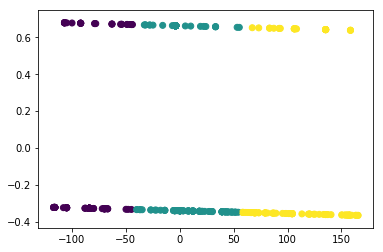

In [250]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
k_means.fit(newdf)
labels = k_means.labels_

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(newdf)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [241]:
k_means.labels_

array([2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 0, 0, 4,
       0, 4, 4, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 0, 2, 0, 1, 3, 3, 1, 2, 2, 2,
       2, 2, 3, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 4,
       2, 1, 2, 0, 2, 0, 4, 1, 1, 1, 3, 4, 1, 1, 1, 0, 2, 0, 1, 1, 4, 4, 4,
       3, 1, 1, 2, 2, 2, 0, 0, 4, 0, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4,
       4, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 4, 2,
       0, 0, 0, 0, 4, 3, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2,
       3, 1, 1, 2, 2, 1, 1, 2, 4, 2, 2, 3, 2, 2, 2, 2, 4, 3, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 3, 4, 1, 1, 3, 3, 3, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 0, 0, 2, 3, 1, 1, 1, 1, 4, 1, 1, 0, 0, 2, 1, 4, 1, 3, 4, 2, 1,
       1, 2, 2, 2, 2, 1, 3, 1, 4, 2, 1, 4, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 4, 2, 2, 1, 3, 3, 3, 2, 2, 4, 3, 3, 2,
       0, 2,

In [252]:
import math
import bt

# dfbt = bt.get('T', start='2015-03-25')

def mymodel(daydiff):
    dfbt = bt.get('T', start='2015-02-25', end='2017-05-01')
    for i,z, x in zip(df25.iloc[:,7], df25.iloc[:,8], df25.iloc[:,17]):
        if not z in quanstocklist:
            continue
        elif z == None or math.isnan(x) == True or z=='TASR' or z=='HOT' or z=='VOD' or z=='EMC' or z=='SUNE' or z=='MDVN':
            continue
        else:
            date_data = i
            stock_name = z
            new_date = i + dt.timedelta(days=daydiff)
            dfbt1 = bt.get(z, start=i, end=new_date)
            dfbt = pd.merge(dfbt,dfbt1, how='left', left_index = True, right_index=True, suffixes=['_X','_X'])
    return dfbt

In [182]:
import bt
data = bt.get('googl', start='2017-04-30', end='2017-06-19')

https://query1.finance.yahoo.com/v7/finance/download/GOOGL?period1=1493524800&period2=1497844800&interval=1d&events=history&crumb=GgrQ3ledhai


In [161]:
data1 = bt.get('chk', start='2017-05-10', end='2017-05-12')

In [162]:
data2 = bt.get('bac', start='2017-05-17', end='2017-05-19')

In [119]:
data2.dtypes

bac    float64
dtype: object

In [163]:
tmp = pd.merge(left=data2.reset_index(),right=data1.reset_index(), how='outer', on='Date')
tmp = tmp.set_index('Date')

In [164]:
import numpy as np
tmp = tmp.replace('NaN', np.nan)

In [165]:
import datetime as dt

In [166]:
tmp.index = pd.to_datetime(tmp.index)

In [167]:
tmp.index = tmp.index.sort_values(ascending=True)

In [168]:
tmp.head()

,bac,chk
Date,,
2017-05-10,22.496113,NaN
2017-05-11,22.665556,NaN
2017-05-12,22.974541,NaN
2017-05-17,NaN,5.75
2017-05-18,NaN,5.72


In [176]:
# MyModel = bt.Strategy('MyModel', [bt.algos.RunDaily(),
#                        bt.algos.SelectHasData(),
#                        bt.algos.WeighEqually(),
#                        bt.algos.Rebalance()])

# test2 = bt.Backtest(MyModel, tmp)
# res2 = bt.run(test2)

In [187]:
# bt.core.
SPY = bt.Strategy('MyModel', [bt.algos.RunDaily(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

test = bt.Backtest(SPY, data)
res = bt.run(test)

MyModel
0% [############################# ] 100% | ETA: 00:00:00

In [188]:
res.display()

Stat                 MyModel
-------------------  ----------
Start                2017-04-30
End                  2017-06-19
Risk-free rate       0.00%

Total Return         4.07%
Daily Sharpe         1.90
Daily Sortino        1.88
CAGR                 33.82%
Max Drawdown         -4.55%
Calmar Ratio         7.44

MTD                  -1.20%
3m                   -
6m                   -
YTD                  4.07%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  33.82%

Daily Sharpe         1.90
Daily Sortino        1.88
Daily Mean (ann.)    29.94%
Daily Vol (ann.)     15.72%
Daily Skew           -1.63
Daily Kurt           4.25
Best Day             1.73%
Worst Day            -3.40%

Monthly Sharpe       1.55
Monthly Sortino      -
Monthly Mean (ann.)  24.80%
Monthly Vol (ann.)   16.01%
Monthly Skew         -
Monthly Kurt         -
Best Month           5.33%
Worst Month          -1.20%

Yearly Sharpe        -
Yearly Sortino  

In [253]:
# dfbt10 = mymodel(10)
# dfbt20 = mymodel(20)
dfbt30 = mymodel(30)

https://query1.finance.yahoo.com/v7/finance/download/T?period1=1424840400&period2=1493611200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/GE?period1=1428638400&period2=1431230400&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1428638400&period2=1431230400&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/FRO?period1=1428897600&period2=1431489600&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/GE?period1=1429243200&period2=1431835200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/GE?period1=1429675200&period2=1432267200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/SDRL?period1=1429848000&period2=1432440000&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.

https://query1.finance.yahoo.com/v7/finance/download/SDRL?period1=1446613200&period2=1449205200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/INTC?period1=1446699600&period2=1449291600&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1446786000&period2=1449378000&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1447045200&period2=1449637200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/JCP?period1=1447218000&period2=1449810000&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1447390800&period2=1449982800&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BP?period1=1447390800&period2=1449982800&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.fina

https://query1.finance.yahoo.com/v7/finance/download/FCX?period1=1463457600&period2=1466049600&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/WMT?period1=1463630400&period2=1466222400&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1463976000&period2=1466568000&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/EXPR?period1=1464148800&period2=1466740800&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/TEX?period1=1464321600&period2=1466913600&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1464753600&period2=1467345600&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1464840000&period2=1467432000&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.fin

https://query1.finance.yahoo.com/v7/finance/download/HPQ?period1=1477627200&period2=1480222800&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/F?period1=1477972800&period2=1480568400&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BP?period1=1477972800&period2=1480568400&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1478145600&period2=1480741200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/FCX?period1=1478404800&period2=1481000400&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/FCX?period1=1478494800&period2=1481086800&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/FCX?period1=1478581200&period2=1481173200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.

https://query1.finance.yahoo.com/v7/finance/download/BBBY?period1=1491451200&period2=1494043200&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/SO?period1=1491537600&period2=1494129600&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1492401600&period2=1494993600&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/BAC?period1=1492488000&period2=1495080000&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/GS?period1=1492488000&period2=1495080000&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/MS?period1=1492574400&period2=1495166400&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.yahoo.com/v7/finance/download/FL?period1=1492660800&period2=1495252800&interval=1d&events=history&crumb=Fb461c19PRe
https://query1.finance.

In [33]:
dfbt30 = dfbt30.rename(columns = lambda x : str(x)[:-2])

In [34]:
dfbt30 = dfbt30.groupby(lambda x:x, axis=1).sum()

In [1267]:
dfbt30 = dfbt30.drop(dfbt30.columns[0], axis=1)

In [1121]:
# dfbt30 = dfbt30.drop(dfbt30.columns[0], axis=1)
# dfbt30 = dfbt30.fillna(0)

In [1116]:
# def clean_columns(dataframe):
#     cols=pd.Series(dataframe.columns)
#     for dup in dataframe.columns.get_duplicates(): cols[dataframe.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(dataframe.columns.get_loc(dup).sum())]
#     dataframe.columns=cols
#     return dataframe

In [1270]:
dfbt31 = dfbt30.iloc[:,[1]]

In [1284]:
# s = bt.Strategy('MyModel', [bt.algos.RunDaily(),
#                        bt.algos.SelectHasData(),
#                        bt.algos.WeighEqually(),
#                        bt.algos.Rebalance()])
# s10 = bt.Strategy('MyModel10', [bt.algos.RunDaily(),
#                        bt.algos.SelectHasData(),
#                        bt.algos.WeighEqually(),
#                        bt.algos.Rebalance()])
# s20 = bt.Strategy('MyModel20', [bt.algos.RunDaily(),
#                        bt.algos.SelectHasData(),
#                        bt.algos.WeighEqually(),
#                        bt.algos.Rebalance()])
s30 = bt.Strategy('MyModel30', [
                       bt.algos.SelectHasData(min_count=1),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])


s31 = bt.Strategy('MyModel31', [bt.algos.SelectHasData(min_count=0),
                                bt.algos.WeighEqually()])

# s32 = bt.Strategy.

In [ ]:
# test10 = bt.Backtest(s10,clean_columns(dfbt10))
# test20 = bt.Backtest(s20,clean_columns(dfbt20))
test30 = bt.Backtest(s31, dfbt31)

# res10 = bt.run(test10)
# res20 = bt.run(test20)
res30 = bt.run(test30)



# test = bt.Backtest(s, dfbt)
# res = bt.run(test)

In [1095]:
dfbt30 = dfbt30.rename(index=str, columns={"ge_x": "ge"})

In [ ]:
res30.display()

In [ ]:
data = bt.get('SPY', start='2015-03-25')
s2 = bt.Strategy('S&P500', [bt.algos.RunDaily(),
                        bt.algos.SelectHasData(min_count=1),
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test2, test20)

res2.plot()

In [ ]:
res2.plot_correlation()


In [1063]:
df25['perc_one'].describe()

count    335.000000
mean     3.448099  
std      16.473619 
min     -44.407895 
25%     -4.029386  
50%      0.409127  
75%      7.078012  
max      92.000000 
Name: perc_one, dtype: float64

In [1062]:
#SHARPE VALUE
(df25['perc_one'].mean() - 1.09)/(df25['perc_one'].std())

0.14314394155792776

In [ ]:
##

#SHARPE VALUE
# (df25['perc_one'].mean() - 1.09)/(df25['perc_one'].std())

In [1052]:
# ## Backup Data
# count = 0
# enum_list = []
# for a, b in zip(df25.iloc[:,7], df25.iloc[:,9]):
#     if not b in quanstocklist:
# #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
#         enum_list.append('BLANK')
#         count += 1
#     else:
#         date_data = a
#         stock_name = b
#         new_date = a + dt.timedelta(days=30)
#         my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
#         enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3] * 100)
#         count += 1
# #     print(count)
# #     print(enum_list)
# se = pd.Series(enum_list)
# df27['perc_two'] = se.values

In [ ]:
### BACKUP PART 2
# import math
# import bt

# def mymodel(daydiff):
# dfbt = bt.get('T', start='2015-03-25')

# for i,z, x in zip(df25.iloc[:,7], df25.iloc[:,8], df25.iloc[:,17]):
#     if not b in quanstocklist:
#         continue
#     elif z == None or math.isnan(x) == True or z=='TASR' or z=='HOT' or z=='VOD' or z=='EMC' or z=='SUNE' or z=='MDVN':
#         continue
#     else:
#         date_data = i
#         stock_name = z
#         new_date = i + dt.timedelta(days=30)
#         dfbt1 = bt.get(z, start=i, end=new_date)
#         dfbt = pd.merge(dfbt,dfbt1, how='left', left_index = True, right_index=True)

In [ ]:
# BACKUP PT 3

# import math
# import bt

# dfbt = bt.get('T', start='2015-03-25')

# def mymodel(daydiff):
#     dfbt = bt.get('T', start='2015-03-25', end='2017-05-01')
#     for i,z, x in zip(df25.iloc[:,7], df25.iloc[:,8], df25.iloc[:,17]):
#         if not b in quanstocklist:
#             continue
#         elif z == None or math.isnan(x) == True or z=='TASR' or z=='HOT' or z=='VOD' or z=='EMC' or z=='SUNE' or z=='MDVN':
#             continue
#         else:
#             date_data = i
#             stock_name = z
#             new_date = i + dt.timedelta(days=daydiff)
#             dfbt1 = bt.get(z, start=i, end=new_date)
#             dfbt = pd.merge(dfbt,dfbt1, how='left', left_index = True, right_index=True)
#     return dfbt

In [ ]:
# cols=pd.Series(dfbt.columns)
# for dup in dfbt.columns.get_duplicates(): cols[dfbt.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(dfbt.columns.get_loc(dup).sum())]
# dfbt.columns=cols

In [226]:
def getStock(symbol, start, end):
    """
    Downloads Stock from Yahoo Finance.
    Computes daily Returns based on Adj Close.
    Returns pandas dataframe.
    """
    df =  pd.io.data.get_data_yahoo(symbol, start, end)
 
    df.columns.values[-1] = 'AdjClose'
    df.columns = df.columns + '_' + symbol
    df['Return_%s' %symbol] = df['AdjClose_%s' %symbol].pct_change()
    
    return df

In [230]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import operator
import pandas.io.data
from sklearn.qda import QDA
import re
from dateutil import parser
from backtest import Strategy, Portfolio

def getStockFromQuandl(symbol, name, start, end):
    """
    Downloads Stock from Quandl.
    Computes daily Returns based on Adj Close.
    Returns pandas dataframe.
    """
    import Quandl
    df =  Quandl.get(symbol, trim_start = start, trim_end = end, authtoken="your token")

    df.columns.values[-1] = 'AdjClose'
    df.columns = df.columns + '_' + name
    df['Return_%s' %name] = df['AdjClose_%s' %name].pct_change()
    
    return df

def getStockFromQuandl(symbol, name, start, end):
    """
    Downloads Stock from Quandl.
    Computes daily Returns based on Adj Close.
    Returns pandas dataframe.
    """
    import Quandl
    df =  Quandl.get(symbol, trim_start = start, trim_end = end, authtoken="your token")
 
    df.columns.values[-1] = 'AdjClose'
    df.columns = df.columns + '_' + name
    df['Return_%s' %name] = df['AdjClose_%s' %name].pct_change()
    
    return df




def getStockDataFromWeb(fout, start_string, end_string):
    """
    Collects predictors data from Yahoo Finance and Quandl.
    Returns a list of dataframes.
    """
    start = parser.parse(start_string)
    end = parser.parse(end_string)
    
    nasdaq = getStock('^IXIC', start, end)
    frankfurt = getStock('^GDAXI', start, end)
    london = getStock('^FTSE', start, end)
    paris = getStock('^FCHI', start, end)
    hkong = getStock('^HSI', start, end)
    nikkei = getStock('^N225', start, end)
    australia = getStock('^AXJO', start, end)
    
    djia = getStockFromQuandl("YAHOO/INDEX_DJI", 'Djia', start_string, end_string) 
    
    out =  pd.io.data.get_data_yahoo(fout, start, end)
    out.columns.values[-1] = 'AdjClose'
    out.columns = out.columns + '_Out'
    out['Return_Out'] = out['AdjClose_Out'].pct_change()
    
    return [out, nasdaq, djia, frankfurt, london, paris, hkong, nikkei, australia]



def getStockDataFromWeb(fout, start_string, end_string):
    """
    Collects predictors data from Yahoo Finance and Quandl.
    Returns a list of dataframes.
    """
    start = parser.parse(start_string)
    end = parser.parse(end_string)
    
    nasdaq = getStock('^IXIC', start, end)
    frankfurt = getStock('^GDAXI', start, end)
    london = getStock('^FTSE', start, end)
    paris = getStock('^FCHI', start, end)
    hkong = getStock('^HSI', start, end)
    nikkei = getStock('^N225', start, end)
    australia = getStock('^AXJO', start, end)
    
    djia = getStockFromQuandl("YAHOO/INDEX_DJI", 'Djia', start_string, end_string) 
    
    out =  pd.io.data.get_data_yahoo(fout, start, end)
    out.columns.values[-1] = 'AdjClose'
    out.columns = out.columns + '_Out'
    out['Return_Out'] = out['AdjClose_Out'].pct_change()
    
    return [out, nasdaq, djia, frankfurt, london, paris, hkong, nikkei, australia]

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.